This script try to extract top level comments from multiple videos of multiple youtube channels, perform some cleaning, and plot wordclouds of common words.

In [802]:
import json

Read in comment data

In [803]:
with open('comment_threads.txt', 'r') as f:
    data = json.load(f)

In [804]:
comments = {}

In [805]:
# concatenate all top level comments for each youtuber
for k in data.keys():
    toplevelcomment = ''
    for video in data[k]:
        for thread in video[0][0]['items']:
            toplevelcomment += (thread['snippet']['topLevelComment']['snippet']['textDisplay'])
            
    comments[k] = toplevelcomment

In [806]:
import nltk
from wordcloud import WordCloud
%matplotlib inline
from nltk.corpus import stopwords


In [807]:
# Clean emoji, stopwords, etc
def clean_text(text):

    # remove emoji
    myre = re.compile(u'('
        u'\ud83c[\udf00-\udfff]|'
        u'\ud83d[\udc00-\ude4f\ude80-\udeff]|'
        u'[\u2600-\u26FF\u2700-\u27BF])+|'
        u'\ufeff|'
        u'\ufe0f|'
        '\n', 
        re.UNICODE)
    text = myre.sub(' ', text)
    
    # clean string end
    myre = re.compile('\!+|\?+|\.+')
    text = myre.sub('.', text)

    # define stopwords  
    stop = set(stopwords.words('english'))
    stop.update(['bubz','jaclyn','jeffree','lisa','nikkie','tati','channel'])
    
    # tokenzie    
    token = [t for t in word_tokenize(text.lower()) if (t not in stop) & (t.isalpha())]
    
    # lemmatize each token    
    lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()    
    result = []
    for t in token:
        result.append(lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(t, pos='n'), pos='v'), pos='a'))
                 
    return (' '.join(result))

# determine whether a word is noun, verb, or adjective
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(100)) for tag in cfd.conditions())

# plot a wordcloud
def wordcloudplot(text):
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# plot of wordcloud of just adjective
def top_adj_cloud_plot(text):
    # tokenize
    token = nltk.word_tokenize(text)
    
    # create pos tag
    tem = nltk.pos_tag(token)
    
    # find adjective 
    tagdict = findtags('JJ', tem)  
    tem = tagdict['JJ']
    
    # concatenate all adjective    
    text = ''
    for adj in tem:
        text += " ".join(adj[0] for i in range(adj[1]))
        
    # plot
    wordcloudplot(text)


### Wordcloud of most comment words in comment section of each youtuber

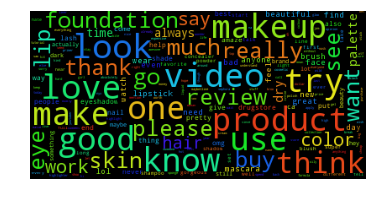

In [808]:
# If we consider all kinf of words
wordcloudplot(tati)

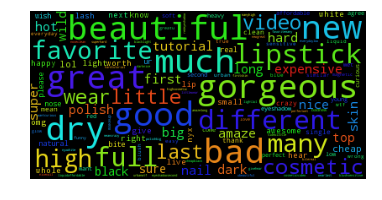

In [809]:
# If we consider adjective
tati = clean_text(comments['Tati'])
top_adj_cloud_plot(tati)

Note: Some of the words are not adjective but the majority are.

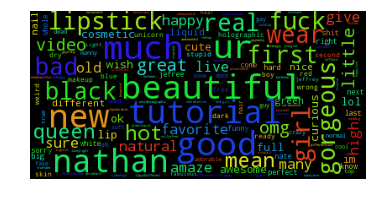

In [630]:
jeffree = clean_text(comments['jeffreestar'])
top_adj_cloud_plot(jeffree)

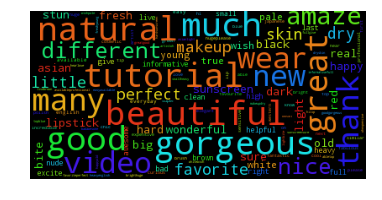

In [632]:
lisa = clean_text(comments['Lisa Eldridge'])
top_adj_cloud_plot(lisa)

Some of the words are overlapped throughout the channels. Even though I expected more standout differences among them, we can still see some distinct words in each channel. For example, we have 'expensive' for Tati since she often does WTF videos in which she reviews insanly highend products. Same applies for the rest. The comment sections seem to represent each channel on some levels and we might be able to get some good features out of them.